# Correlation between rainfall and overflow

In [1]:
import context
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()
sns.set_context("paper", rc={"font.size":8.0, 
                             'lines.linewidth':1, 
                             'patch.linewidth':0.5, 
                             "axes.titlesize":8, 
                             "axes.labelsize":8, 
                             'xtick.labelsize':8, 
                             'ytick.labelsize':8, 
                             'legend.fontsize':8 ,  
                             'pgf.rcfonts' : False})

In [72]:
result_data = 'data_results/overflow_130616_130617_2.pkl'
results = pd.read_pickle(result_data)
max_overflow = pd.DataFrame(results.max(axis=1))\
        .rename({0:'max_overflow'},axis=1)
#max_overflow.head()

In [73]:
rain_data = 'data_pmm/20130616-S000000-E002959-20130617-S233000-E235959.pkl'
rain_dataf = pd.read_pickle(rain_data).set_index('Reach_ID')
area = rain_dataf[['area_sk']]
rain = rain_dataf.drop('area_sk',axis=1)

In [76]:
rain_flow = pd.DataFrame(rain\
            .sum(axis=1))\
            .rename({0:'total_rain_mmh'},axis=1)\
            .join(max_overflow)
rain_flow['total_rain_mm'] = rain_flow['total_rain_mmh'] / 2
rain_flow.head()

,total_rain_mmh,max_overflow,total_rain_mm
Reach_ID,,,
40763397,126.416490,745.046714,63.208245
40894470,23.594527,12.946060,11.797264
40894471,45.016647,16.197745,22.508323
40763399,91.566055,308.959039,45.783027
40763402,181.004435,3655.129534,90.502218


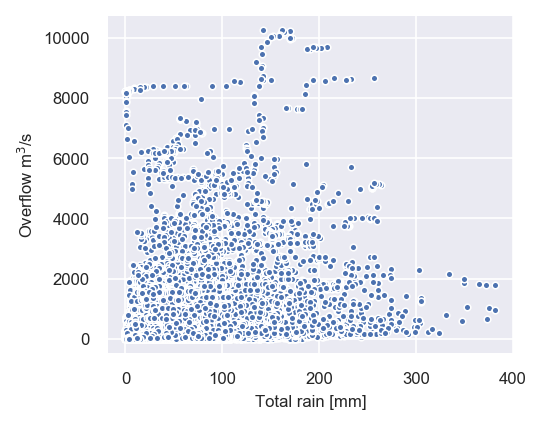

In [77]:
fig = plt.figure(figsize=(3.5,3),dpi=150)
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)
ax = sns.scatterplot(data=rain_flow,x='total_rain_mm',y='max_overflow',s = 10,edgecolor='white')
plt.ylabel('Overflow m$^3$/s');
plt.xlabel('Total rain [mm]');
#plt.savefig('../../thesis/report/figs/scatter.pdf', bbox_inches = 'tight')

We can obtain a measure for locality of effect by plotting rainfall versus overflow for each reach.
This is done in the figure.
If rainfall causes a local overflow, we would expect an correlation between increasing rainfall and overflow in that reach.
If that is not the case, rainfall causes overflows downstream than there is no clear correlation between the two.
The figure shows that there is no clear correlation between rainfall and overflow within the same reach.
This figure shows that the effect of rainfall is not local, but downstream.
This is an indication of the cascading effect.

Another observation from the plot are the dots that form horizontal patterns, for example just above 8000 m$^3$/s.
These patters exist because of subsequent connected reaches.
If a reach is flooded, the neighbouring reaches are likely to be flooded by the same amount.
These dots at the same overflow level, with slightly different rainfall appear as 'lines' in the graph.